In [14]:
# !pip install torch


In [11]:
import torch
print(torch.__version__)


2.4.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import glob
from torch.utils.data import Dataset, DataLoader

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

# Load the Data set

Data set link is: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection?resource=download

In [48]:
# Loading the Yes Tumor data

tumor = []
path = './MRI_DATA/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))  # resize the images
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

In [49]:
len(tumor)

154

In [50]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [57]:
# Loading the No tumor data

healthy= []
path = './MRI_DATA/brain_tumor_dataset/no/*.jpg'

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [87]:
len(healthy)

91

In [59]:
# for img in health:
#     print(img.shape)

# Convert into Nnmpy array

In [88]:
healthy = np.array(healthy)
tumor = np.array(tumor)

In [89]:
tumor.shape

(154, 128, 128, 3)

154 data , 128 height, 128 weidth, 3 channels or color

In [90]:
154+91

245

In [91]:
ALL= np.concatenate((healthy,tumor))

In [92]:
All.shape

(427, 128, 128, 3)

In [94]:
healthy.shape

(91, 128, 128, 3)

In [95]:
healthy.shape[0]

91

In [96]:
healty.shape[1]

128

# Visualize the Brain MRI DATA

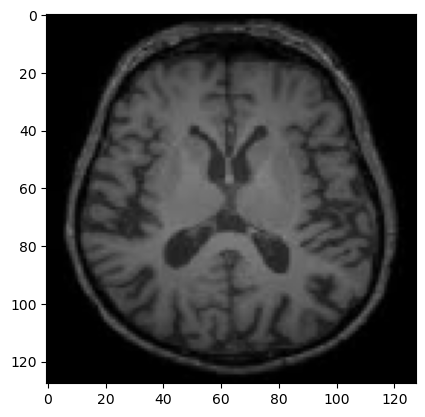

In [98]:
plt.imshow(healthy[0])

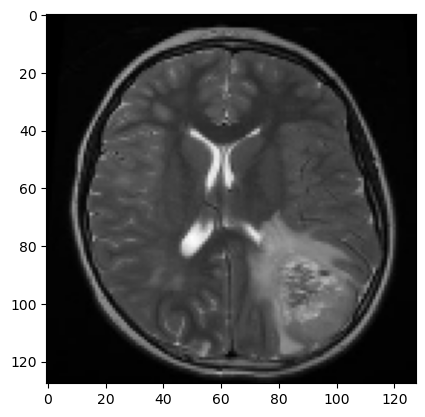

In [83]:
plt.imshow(tumor[2])

In [105]:
def plot_random (healty, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace = False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("healthy brain")
        plt.imshow(healthy_imgs[i])
        
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("tumor brain")
        plt.imshow(tumor_imgs[i])    

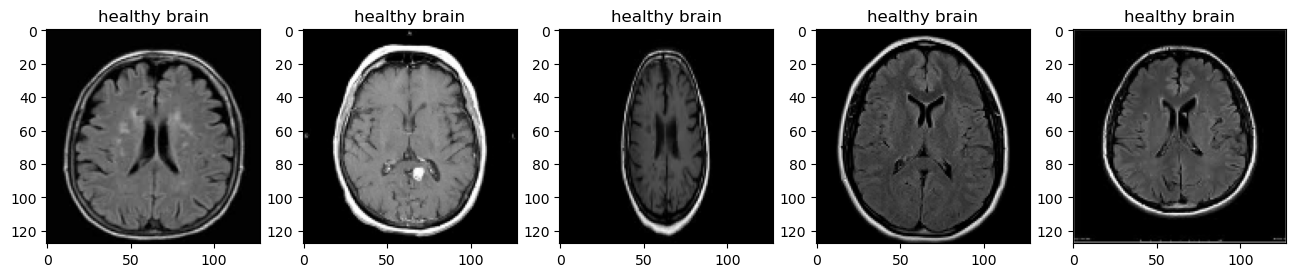

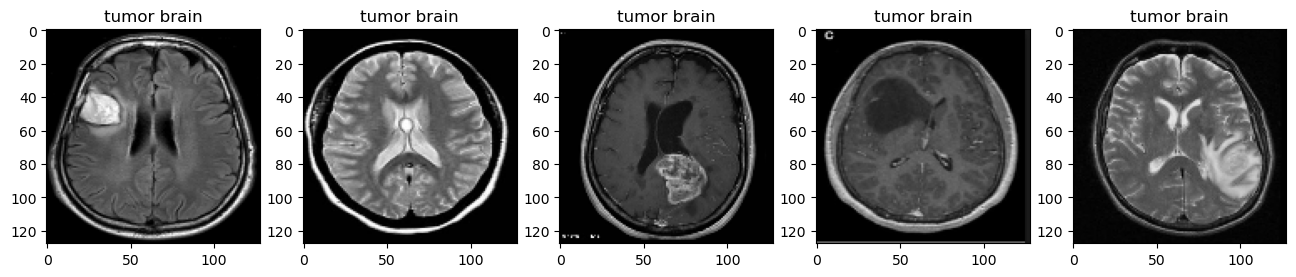

In [109]:
plot_random(healthy, tumor)

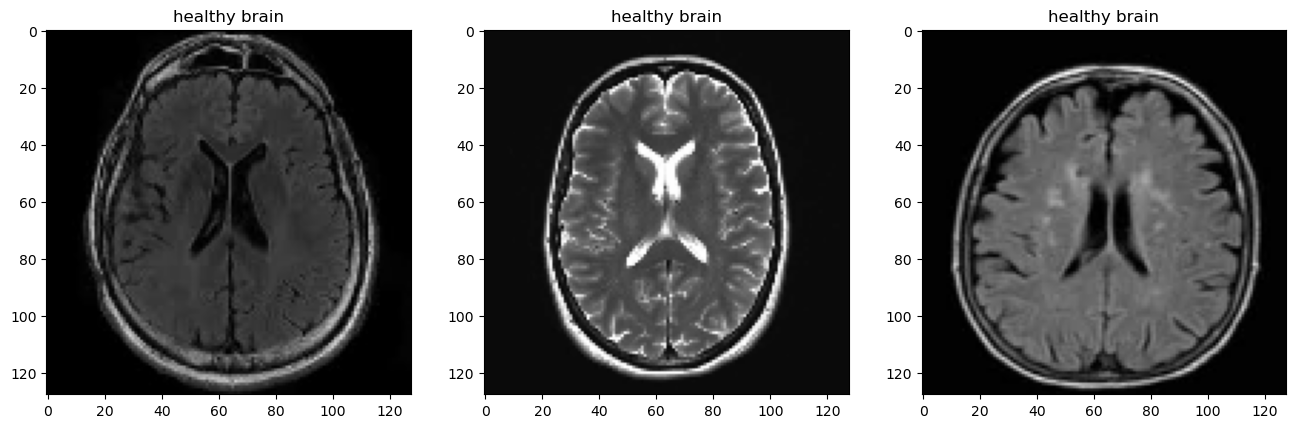

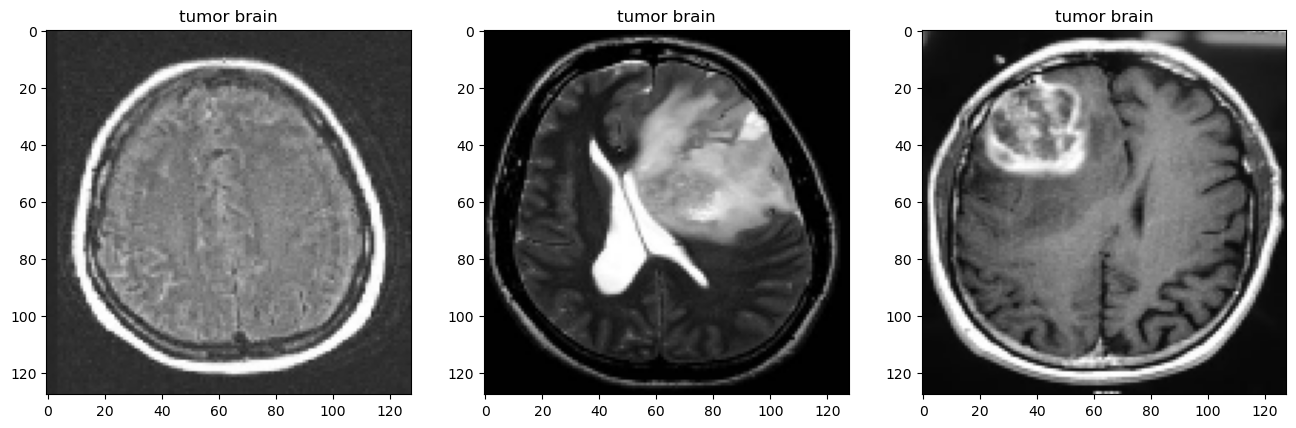

In [110]:
plot_random(healthy, tumor,num=3)